# Beijing Air Quality

## Modeling

### Import packages and data

In [2]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
import pandas as pd
import numpy as np
from pmdarima import auto_arima    # for determining ARIMA orders
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
df = pd.read_pickle('PKL/full.pkl')

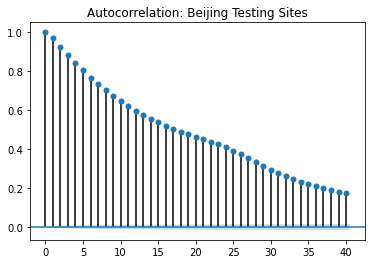

In [3]:
title = 'Autocorrelation: Beijing Testing Sites'
lags = 40
plot_acf(df['PM2.5'],title=title,lags=lags);

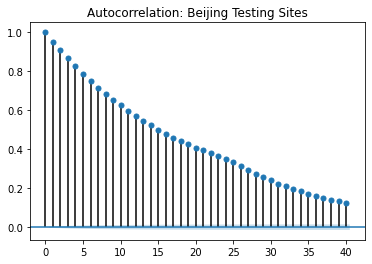

In [5]:
title = 'Autocorrelation: Beijing Testing Sites'
lags = 40
plot_acf(np.log(df['PM2.5']),title=title,lags=lags);

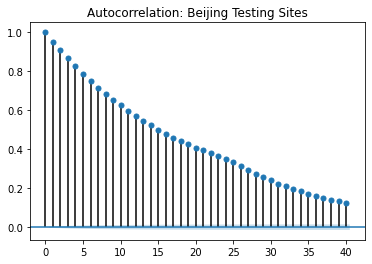

In [6]:
title = 'Autocorrelation: Beijing Testing Sites'
lags = 40
plot_acf(np.log(df['PM2.5']),title=title,lags=lags);

In [7]:
import warnings
import itertools
import statsmodels.api as sm

In [8]:
test = pd.read_pickle('PKL/test.pkl')
train = pd.read_pickle('PKL/train.pkl')

In [9]:
auto_arima(df['PM2.5'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               403776
Model:               SARIMAX(0, 1, 1)   Log Likelihood            -1771146.337
Date:                Thu, 10 Sep 2020   AIC                        3542296.674
Time:                        12:35:43   BIC                        3542318.492
Sample:                             0   HQIC                       3542302.906
                             - 403776                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1971      0.000    632.862      0.000       0.197       0.198
sigma2       378.1257      0.129   2935.695      0.000     377.873     378.378
===================================================================================
Ljung-Box (Q):                     4660.23   Jarque-Bera (JB):         137275224.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(df['PM2.5'], start_p=0, start_q=0,
                         max_p=2, max_q=2, m=12,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   # we don't want to know if an order does not work
                         suppress_warnings=True,  # we don't want convergence warnings
                         stepwise=True)           # set to stepwise

stepwise_fit.summary()

In [ ]:

model = ARIMA(df['PM2.5'][:-1], order=(7,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/paultorres/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/paultorres/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/paultorres/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/paultorres/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has bee